In [9]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree



In [24]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
clf = DecisionTreeClassifier()

In [25]:
scores = cross_val_score(clf, df.drop('target', axis=1), df['target'], cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean accuracy: 0.9666666666666668


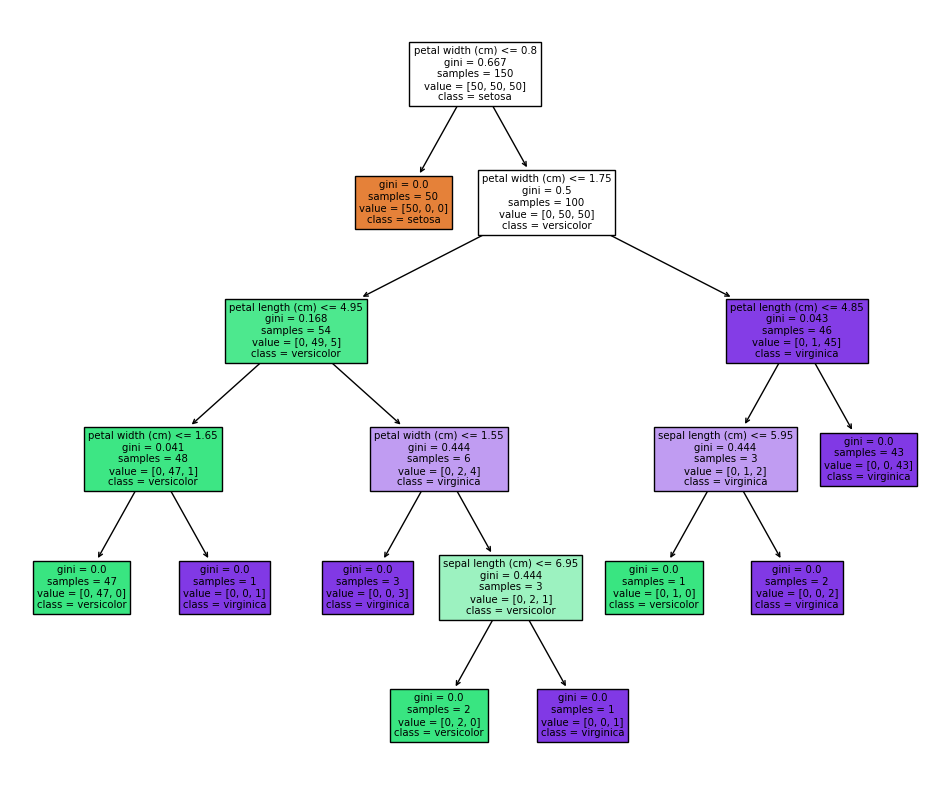

In [27]:
clf.fit(df.drop('target', axis=1), df['target'])

plt.figure(figsize=(12,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [20]:

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3]
}


In [21]:

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(df.drop('target', axis=1), df['target'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score (Accuracy): 0.9666666666666668


q2

In [29]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

print("Dataset Shape:", df.shape)
print("Statistical Summary:")
print(df.describe())


Dataset Shape: (284807, 31)
Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e

In [30]:
X = df.drop('Class', axis=1)
y = df['Class']

print("Features Shape (X):", X.shape)
print("Target Shape (y):", y.shape)


Features Shape (X): (284807, 30)
Target Shape (y): (284807,)


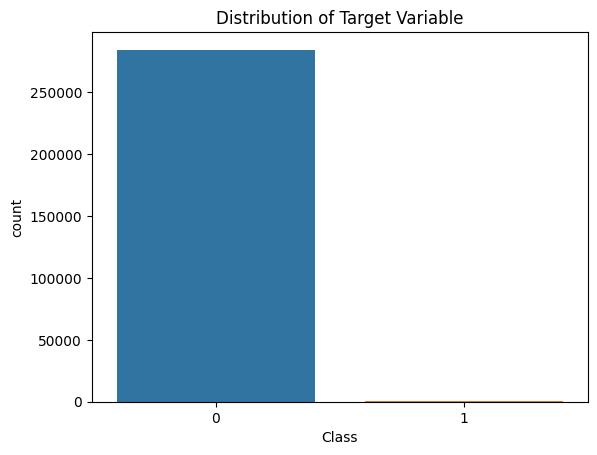

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable')
plt.show()


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

roc_auc_scores = cross_val_score(dt_model, X, y, cv=rkf, scoring='roc_auc')
print("ROC-AUC Scores:", roc_auc_scores)
print("Mean ROC-AUC:", roc_auc_scores.mean())


ROC-AUC Scores: [0.87728723 0.85693183 0.89766022 0.88736821 0.88747373 0.8797362
 0.91970103 0.8467805  0.8568263  0.87735757]
Mean ROC-AUC: 0.8787122830612331


In [35]:

dt_model_balanced = DecisionTreeClassifier(class_weight="balanced")

roc_auc_scores_balanced = cross_val_score(dt_model_balanced, X, y, cv=rkf, scoring='roc_auc')
print("Balanced Class ROC-AUC Scores:", roc_auc_scores_balanced)
print("Mean ROC-AUC (Balanced Class):", roc_auc_scores_balanced.mean())


Balanced Class ROC-AUC Scores: [0.87726965 0.84671016 0.8976954  0.86718867 0.86725901 0.85985931
 0.91980655 0.85700217 0.87741033 0.89766021]
Mean ROC-AUC (Balanced Class): 0.8767861446135539
